### 우리 나라 인구 소멸 위기 지역 분석

- 이상호 한국고용정보원 연구원의 <한국의 지방소멸에 관한 7가지 분석> 보고서
- 인구 소멸 지역의 정의 : 65세 이상 노인 인구와 20~39세 여성 인구를 비교해서 
- 젊은 여성 인구가 노인 인구의 절반에 미달할 경우 인구 소멸 위험 징역으로 분류

In [499]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 


##### 1. 2021년 연령별 총인구 다운로드
- KOSIS : 인구 > 인구총조사 > 인구부문 > 총조사인구(2015) > 전수부문(등록센서스, 2015) > 전수기본표 > 성, 연령 및 세대구성별 인구 - 시군구 (년2015~2021) 선택
- 각 지역별 항목, 필요한 연령대별 항목 선택해서 데이터를 받아야 함.

In [500]:
df = pd.read_csv('data/연령별총인구수_2021년.csv', encoding='euc-kr')
df.head()

,행정구역,행정구역별(시군구),성별,합계,15세미만,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
0,전국,전국,계,49063531,5991713,2090046,2670599,3400702,3091042,3424210,3832964,4002153,4336146,3958355,3988108,2902348,2042154,1529990,1092367,710634
1,전국,전국,남자,24270009,3076190,1067714,1284310,1778098,1597987,1744971,1940421,2018169,2160514,1986284,1955827,1394224,952588,666356,425499,220857
2,전국,전국,여자,24793522,2915523,1022332,1386289,1622604,1493055,1679239,1892543,1983984,2175632,1972071,2032281,1508124,1089566,863634,666868,489777
3,서울특별시,서울특별시,계,9009126,911870,357350,535846,788784,701692,677305,690009,710062,755307,674330,695830,540505,385904,286302,184149,113881
4,서울특별시,서울특별시,남자,4334563,468510,179855,227951,381717,349216,338984,342236,350174,366973,327842,327570,251667,177058,128614,77816,38380


In [501]:
df.isna().sum()

행정구역          0
행정구역별(시군구)    0
성별            0
합계            0
15세미만         0
15~19세        0
20~24세        0
25~29세        0
30~34세        0
35~39세        0
40~44세        0
45~49세        0
50~54세        0
55~59세        0
60~64세        0
65~69세        0
70~74세        0
75~79세        0
80~84세        0
85세이상         0
dtype: int64

##### 2. 데이터 전처리
- 컬럼명 변경, 광역시도 총계는 삭제

In [502]:
df.rename(columns={'행정구역':'광역시도', '행정구역별(시군구)': '시도', '합계':'인구수' }, inplace=True)
df = df[df.광역시도 != df.시도]
df.head()

,광역시도,시도,성별,인구수,15세미만,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
6,서울특별시,종로구,계,133567,11053,4882,9208,12237,9619,8622,9114,10293,11892,10960,10681,8101,5813,5051,3645,2396
7,서울특별시,종로구,남자,64074,5560,2390,3854,6188,4837,4288,4393,4987,5742,5503,5221,3938,2614,2135,1532,892
8,서울특별시,종로구,여자,69493,5493,2492,5354,6049,4782,4334,4721,5306,6150,5457,5460,4163,3199,2916,2113,1504
9,서울특별시,중구,계,113586,8755,3128,7093,10513,9839,9138,8086,7833,9439,8979,9234,7273,5246,4163,2915,1952
10,서울특별시,중구,남자,54479,4472,1485,2809,5007,4889,4604,4149,3937,4617,4464,4527,3495,2451,1793,1156,624


##### 3. 인구 소멸 위기 지역 계산하고 데이터 정리하기
- 20-30대의 인구, 65세 이상 인구수 알기

In [504]:

df['20~39세'] = df['20~24세'] + df['25~29세'] + df['30~34세'] + df['35~39세'] 
df['65세이상'] = df['65~69세'] + df['70~74세'] + df['75~79세'] + df['80~84세'] + df['85세이상'] 
df.head()

,광역시도,시도,성별,인구수,15세미만,15~19세,20~24세,25~29세,30~34세,35~39세,...,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상,20~39세,65세이상
6,서울특별시,종로구,계,133567,11053,4882,9208,12237,9619,8622,...,11892,10960,10681,8101,5813,5051,3645,2396,39686,25006
7,서울특별시,종로구,남자,64074,5560,2390,3854,6188,4837,4288,...,5742,5503,5221,3938,2614,2135,1532,892,19167,11111
8,서울특별시,종로구,여자,69493,5493,2492,5354,6049,4782,4334,...,6150,5457,5460,4163,3199,2916,2113,1504,20519,13895
9,서울특별시,중구,계,113586,8755,3128,7093,10513,9839,9138,...,9439,8979,9234,7273,5246,4163,2915,1952,36583,21549
10,서울특별시,중구,남자,54479,4472,1485,2809,5007,4889,4604,...,4617,4464,4527,3495,2451,1793,1156,624,17309,9519


In [505]:
pop = pd.pivot_table(df, index=['광역시도', '시도'], 
                     columns=['성별'], 
                     values=['인구수', '20~39세', '65세이상'])
pop

20~39세                   65세이상                   인구수                
성별             계      남자      여자       계     남자     여자       계      남자      여자
광역시도 시도                                                                       
강원도  강릉시   46408   25308   21100   44446  19289  25157  206957  103184  103773
     고성군    4091    2427    1664    7593   3254   4339   24332   12308   12024
     동해시   15787    8679    7108   17973   7972  10001   84741   42773   41968
     삼척시   11432    6545    4887   15952   6830   9122   60053   30564   29489
     속초시   16028    8792    7236   15825   6896   8929   78070   38733   39337
...          ...     ...     ...     ...    ...    ...     ...     ...     ...
충청북도 진천군   19790   10955    8835   13470   5909   7561   80994   42125   38869
     청원구   55153   29744   25409   24557  10702  13855  188084   95995   92089
     청주시  225557  118321  107236  112982  49715  63267  816503  408392  408111
     충주시   46426   25644   20782   41166  17985  23181  202627  102215  100412
     흥덕구   78069   40703   37366   29902  13342  16560  258217  129754  128463

[261 rows x 9 columns]

In [506]:
pop['소멸비율'] = pop['20~39세', '여자'] / (pop['65세이상', '계'] )
pop.head()

20~39세                65세이상                   인구수                  \
성별            계     남자     여자      계     남자     여자       계      남자      여자   
광역시도 시도                                                                      
강원도  강릉시  46408  25308  21100  44446  19289  25157  206957  103184  103773   
     고성군   4091   2427   1664   7593   3254   4339   24332   12308   12024   
     동해시  15787   8679   7108  17973   7972  10001   84741   42773   41968   
     삼척시  11432   6545   4887  15952   6830   9122   60053   30564   29489   
     속초시  16028   8792   7236  15825   6896   8929   78070   38733   39337   

              소멸비율  
성별                  
광역시도 시도             
강원도  강릉시  0.474733  
     고성군  0.219149  
     동해시  0.395482  
     삼척시  0.306357  
     속초시  0.457251

- 소멸비율이 1이하면 소멸위기지역

In [507]:
pop['소멸위기지역'] = pop['소멸비율'] < 0.5
pop['소멸위기고위험지역'] = pop['소멸비율'] < 0.2
pop

20~39세                   65세이상                   인구수          \
성별             계      남자      여자       계     남자     여자       계      남자   
광역시도 시도                                                                  
강원도  강릉시   46408   25308   21100   44446  19289  25157  206957  103184   
     고성군    4091    2427    1664    7593   3254   4339   24332   12308   
     동해시   15787    8679    7108   17973   7972  10001   84741   42773   
     삼척시   11432    6545    4887   15952   6830   9122   60053   30564   
     속초시   16028    8792    7236   15825   6896   8929   78070   38733   
...          ...     ...     ...     ...    ...    ...     ...     ...   
충청북도 진천군   19790   10955    8835   13470   5909   7561   80994   42125   
     청원구   55153   29744   25409   24557  10702  13855  188084   95995   
     청주시  225557  118321  107236  112982  49715  63267  816503  408392   
     충주시   46426   25644   20782   41166  17985  23181  202627  102215   
     흥덕구   78069   40703   37366   29902  13342  16560  258217  129754   

                      소멸비율 소멸위기지역 소멸위기고위험지역  
성별            여자                             
광역시도 시도                                      
강원도  강릉시  103773  0.474733   True     False  
     고성군   12024  0.219149   True     False  
     동해시   41968  0.395482   True     False  
     삼척시   29489  0.306357   True     False  
     속초시   39337  0.457251   True     False  
...          ...       ...    ...       ...  
충청북도 진천군   38869  0.655902  False     False  
     청원구   92089  1.034695  False     False  
     청주시  408111  0.949142  False     False  
     충주시  100412  0.504834  False     False  
     흥덕구  128463  1.249615  False     False  

[261 rows x 12 columns]

In [508]:
pop.shape

(261, 12)

In [509]:
pop.to_csv('data/test.csv', encoding='euc-kr')

In [510]:


pop[pop['소멸위기지역'] == True].index.get_level_values(1)

Index(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '인제군', '정선군',
       ...
       '청양군', '태안군', '홍성군', '괴산군', '단양군', '보은군', '영동군', '옥천군', '음성군', '제천시'],
      dtype='object', name='시도', length=108)

##### 4. 시각화하기

In [511]:
pop.reset_index(inplace=True)
tmp_columns = [(pop.columns.get_level_values(0)[n] + ' ' + pop.columns.get_level_values(1)[n]).strip() \
        for n in range(0, len(pop.columns.get_level_values(0))) ]
pop.columns = tmp_columns
pop.head()

,광역시도,시도,20~39세 계,20~39세 남자,20~39세 여자,65세이상 계,65세이상 남자,65세이상 여자,인구수 계,인구수 남자,인구수 여자,소멸비율,소멸위기지역,소멸위기고위험지역
0,강원도,강릉시,46408,25308,21100,44446,19289,25157,206957,103184,103773,0.474733,True,False
1,강원도,고성군,4091,2427,1664,7593,3254,4339,24332,12308,12024,0.219149,True,False
2,강원도,동해시,15787,8679,7108,17973,7972,10001,84741,42773,41968,0.395482,True,False
3,강원도,삼척시,11432,6545,4887,15952,6830,9122,60053,30564,29489,0.306357,True,False
4,강원도,속초시,16028,8792,7236,15825,6896,8929,78070,38733,39337,0.457251,True,False


- geo~.json 의 시도 이름과 테이블의 시도 이름 일치시키기

In [514]:
tmp_gu_dict = {
    '수원' : ['장안구', '권선구', '팔달구', '영통구'],
    '성남' : ['수정구', '중원구', '분당구'], 
    '안양' : ['만안구', '동안구'],
    '안산' : ['상록구', '단원구'],
    '고양' : ['덕양구', '일산동구', '일산서구'],
    '용인' : ['처인구', '기흥구', '수지구'], 
    '청주' : ['상당구', '서원구', '흥덕구', '청원구'],
    '천안' : ['동남구', '서북구'],
    '전주' : ['완산구', '덕진구'],
    '포항' : ['남구', '북구'],
    '창원' : ['의창구', '성산구', '진해구', '마산합포구', '마산회원구']
}

In [515]:
tmp_gu_dict.keys()

dict_keys(['수원', '성남', '안양', '안산', '고양', '용인', '청주', '천안', '전주', '포항', '창원'])

In [516]:
indexs = pop[pop.시도.apply(lambda x : x.replace('시', '') in tmp_gu_dict.keys())].index
pop.drop(pop.index[indexs], inplace=True)
pop.set_index('광역시도', inplace=True)
pop.reset_index(inplace=True)
pop.shape

(250, 14)

In [517]:
def get_guname(g_name, s_name):
    si_name = [None] * len(g_name)
    for n in range(len(g_name)):
        if g_name[n][-3:] not in ['광역시', '특별시', '자치시']:
            if s_name[n][:-1] == '고성' and g_name[n] == '강원도':
                si_name[n] = '고성(강원)'
            elif s_name[n][:-1] == '고성' and g_name[n] == '경상남도':
                si_name[n] = '고성(경남)'
            else:
                si_name[n] = s_name[n][:-1]
            
            for key, values in tmp_gu_dict.items():
                if s_name[n] in values:
                    if len(s_name[n]) == 2:
                        si_name[n] = key + ' ' + s_name[n]
                    elif s_name[n] in ['마산합포구', '마산회원구']:
                        si_name[n] = key + ' ' + s_name[n][2:-1]
                    else:
                        si_name[n] = key + ' ' + s_name[n][:-1]

        elif g_name[n] == '세종특별자치시':
            si_name[n] = '세종'

        else:
            if len(s_name[n]) == 2:
                si_name[n] = g_name[n][:2] + ' ' + s_name[n]
            else:
                si_name[n] = g_name[n][:2] + ' ' + s_name[n][:-1]

    return si_name

In [518]:
pop['ID'] = get_guname(pop['광역시도'], pop['시도'])

In [519]:
del pop['20~39세 남자']
del pop['65세이상 남자']
del pop['65세이상 여자']
pop.tail(20)

,광역시도,시도,20~39세 계,20~39세 여자,65세이상 계,인구수 계,인구수 남자,인구수 여자,소멸비율,소멸위기지역,소멸위기고위험지역,ID
230,충청남도,서천군,6063,2649,17979,46866,23003,23863,0.147339,True,True,서천
231,충청남도,아산시,82664,39083,41637,311911,160310,151601,0.938660,False,False,아산
232,충청남도,예산군,11338,5085,23471,71618,35719,35899,0.216650,True,False,예산
233,충청남도,청양군,3884,1700,10499,28071,14187,13884,0.161920,True,True,청양
234,충청남도,태안군,8700,3643,18643,57138,28826,28312,0.195408,True,True,태안
235,충청남도,홍성군,18820,8968,23011,95155,47148,48007,0.389727,True,False,홍성
236,충청북도,괴산군,4739,1978,12384,34349,17542,16807,0.159722,True,True,괴산
237,충청북도,단양군,3278,1447,8530,25772,13041,12731,0.169637,True,True,단양
238,충청북도,보은군,3802,1690,10640,29357,14642,14715,0.158835,True,True,보은
239,충청북도,상당구,44320,21546,29165,184612,90996,93616,0.738762,False,False,청주 상당


In [520]:
pop_folium = pop.set_index('ID')
pop_folium.head()

,광역시도,시도,20~39세 계,20~39세 여자,65세이상 계,인구수 계,인구수 남자,인구수 여자,소멸비율,소멸위기지역,소멸위기고위험지역
ID,,,,,,,,,,,
강릉,강원도,강릉시,46408,21100,44446,206957,103184,103773,0.474733,True,False
고성(강원),강원도,고성군,4091,1664,7593,24332,12308,12024,0.219149,True,False
동해,강원도,동해시,15787,7108,17973,84741,42773,41968,0.395482,True,False
삼척,강원도,삼척시,11432,4887,15952,60053,30564,29489,0.306357,True,False
속초,강원도,속초시,16028,7236,15825,78070,38733,39337,0.457251,True,False


In [521]:
pop_folium.index.values

array(['강릉', '고성(강원)', '동해', '삼척', '속초', '양구', '양양', '영월', '원주', '인제',
       '정선', '철원', '춘천', '태백', '평창', '홍천', '화천', '횡성', '가평', '과천', '광명',
       '광주', '구리', '군포', '수원 권선', '용인 기흥', '김포', '남양주', '안산 단원', '고양 덕양',
       '동두천', '안양 동안', '안양 만안', '부천', '성남 분당', '안산 상록', '성남 수정', '용인 수지',
       '시흥', '안성', '양주', '양평', '여주', '연천', '수원 영통', '오산', '의왕', '의정부',
       '이천', '고양 일산동', '고양 일산서', '수원 장안', '성남 중원', '용인 처인', '파주', '수원 팔달',
       '평택', '포천', '하남', '화성', '거제', '거창', '고성(경남)', '김해', '남해', '창원 합포',
       '창원 회원', '밀양', '사천', '산청', '창원 성산', '양산', '의령', '창원 의창', '진주',
       '창원 진해', '창녕', '통영', '하동', '함안', '함양', '합천', '경산', '경주', '고령',
       '구미', '군위', '김천', '포항 남구', '문경', '봉화', '포항 북구', '상주', '성주', '안동',
       '영덕', '영양', '영주', '영천', '예천', '울릉', '울진', '의성', '청도', '청송', '칠곡',
       '광주 광산', '광주 남구', '광주 동구', '광주 북구', '광주 서구', '대구 남구', '대구 달서',
       '대구 달성', '대구 동구', '대구 북구', '대구 서구', '대구 수성', '대구 중구', '대전 대덕',
       '대전 동구', '대전 서구', '대전 유성', '대전 중구', '부산 강서', '부산 금정', '

In [522]:
import folium
import json
import warnings
warnings.filterwarnings('ignore')

In [523]:
geo_path = 'data/05. skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))

In [524]:
gmap = folium.Map(location=[36.2002, 127.054], zoom_start=7)

folium.Choropleth(geo_data=geo_data, 
               data=pop_folium['인구수 계'],
               columns = [pop_folium.index, pop_folium['인구수 계']],
               fill_color='YlGnBu', #PuRd, YlGnBu
               key_on='feature.id'
).add_to(gmap)

title_html='<h3 align="center" style="font-size:20px;">전국 인구</h3>'
gmap.get_root().html.add_child(folium.Element(title_html))
gmap


##### 5. Catogram으로 우리나라 지도 만들기

In [525]:
draw_korea_raw = pd.read_excel('data/draw_korea_raw(2021).xlsx')
draw_korea_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,춘천,인제,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,파주,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,NaN,고양 일산서,고양 덕양,서울 강북,서울 성북,가평,구리,양평,평창,강릉,NaN,NaN
4,NaN,NaN,김포,광명,서울 은평,서울 서대문,서울 종로,서울 동대문,서울 중랑,여주,정선,동해,NaN,NaN
5,NaN,인천 강화,부천,안양 만안,서울 강서,서울 마포,서울 중구,서울 성동,서울 강동,이천,원주,삼척,NaN,NaN
6,NaN,인천 서구,인천 동구,안양 동안,서울 양천,서울 동작,서울 용산,서울 광진,서울 송파,하남,영월,울진,NaN,NaN
7,NaN,NaN,인천 계양,시흥,서울 금천,서울 영등포,서울 서초,서울 강남,성남 중원,광주,태백,봉화,NaN,NaN
8,NaN,NaN,인천 부평,안산 상록,서울 구로,서울 관악,과천,성남 분당,성남 수정,용인 처인,영주,영양,NaN,울릉
9,NaN,인천 중구,인천 미추홀,안산 단원,군포,의왕,수원 권선,수원 영통,용인 수지,용인 기흥,예천,영덕,NaN,NaN


In [526]:
# stack() : 열을 피벗화하여 하위 인덱스로 변환하는 메서드
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked

0
0  7       철원
   8       화천
   9       양구
   10  고성(강원)
1  3       양주
...       ...
24 2       장흥
   3       보성
25 2       완도
   5       제주
26 5      서귀포

[250 rows x 1 columns]

In [527]:
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked

,level_0,level_1,0
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
245,24,2,장흥
246,24,3,보성
247,25,2,완도
248,25,5,제주


In [528]:
draw_korea_raw_stacked.rename(columns={'level_0': 'y', 'level_1': 'x', 0 :'ID'}, inplace=True)
draw_korea = draw_korea_raw_stacked
draw_korea

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
245,24,2,장흥
246,24,3,보성
247,25,2,완도
248,25,5,제주


In [529]:
BORDER_LINES = [
    [(5, 1), (5, 2), (6, 2), (6, 3), (11, 3), (11, 0)],        # 인천
    [(4, 4), (4, 5), (2, 5), (2, 7), (4, 7), (4, 9), (7, 9),
     (7, 8), (8, 8), (8, 6), (9, 6), (9, 4), (4, 4)], # 서울
    [(1, 7), (1, 8), (3, 8), (3, 10), (10, 10), (10, 7), 
     (12, 7), (12, 6), (11, 6), (11, 5), (12, 5), (12, 4), 
     (11, 4), (11, 3)], # 경기도
    [(8, 10), (8, 11), (6, 11), (6, 12)], # 강원도
    [(12, 5), (13, 5), (13, 4), (14, 4), (14, 5), (15, 5),
     (15, 4), (16, 4), (16, 2)], # 충청북도
    [(16, 4), (17, 4), (17, 5), (16, 5), (16, 6), (19, 6), 
     (19, 5), (20, 5), (20, 4), (21, 4), (21, 3), (19, 3), (19, 1)], # 전라북도
    [(13, 5), (13, 6), (16, 6)], # 대전시
    [(13, 5), (14, 5)], # 세종시
    [(21, 2), (21, 3), (22, 3), (22, 4), (24, 4), (24, 2), (21, 2)], # 광주
    [(20, 5), (21, 5), (21, 6), (23, 6)],   # 전라남도
    [(10, 8), (12, 8), (12, 9), (14, 9), (14, 8), (16, 8), (16, 6)], # 충청북도
    [(14, 9), (14, 11), (14, 12), (13, 12), (13, 13)], # 경상북도
    [(15, 8), (17, 8), (17, 10), (16, 10), (16, 11), (14, 11)], # 대구
    [(17, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10), (21, 10)], # 부산
    [(16, 11), (16, 13)], # 울산
#   [(9, 14), 9, 15)],
    [(27, 5), (27, 6), (25, 6)]
]

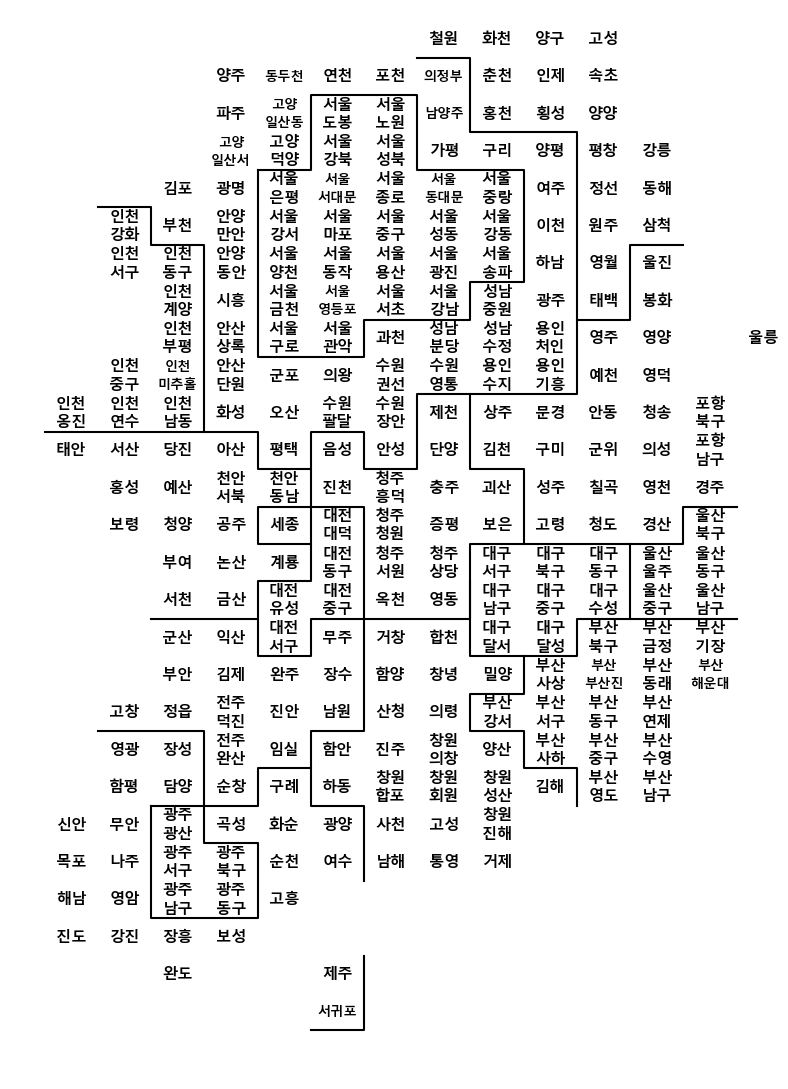

In [530]:
plt.figure(figsize=(8, 11))

# 지역 이름 표시
for idx, row in draw_korea.iterrows():
    # print(row['ID'])
    # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다.
    # (중구, 서구)
    if len(row['ID'].split()) == 2:
        dispname = f"{row['ID'].split()[0]}\n{row['ID'].split()[1]}"
    elif row['ID'][:2] == '고성':
        dispname = '고성'
    else:
        dispname = row['ID']

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에  작은 글자로 표시한다.
    # splitlines() : \n기준으로 split
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x'] + 0.5, row['y'] + 0.5), weight='bold', 
                 fontsize=fontsize, ha='center', va='center', linespacing=linespacing)
    
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)
plt.gca().invert_yaxis()
plt.axis('off')
plt.tight_layout()
plt.show()

In [531]:
pop = pd.merge(pop, draw_korea, how='left', on=['ID'])
pop.head()

,광역시도,시도,20~39세 계,20~39세 여자,65세이상 계,인구수 계,인구수 남자,인구수 여자,소멸비율,소멸위기지역,소멸위기고위험지역,ID,y,x
0,강원도,강릉시,46408,21100,44446,206957,103184,103773,0.474733,True,False,강릉,3,11
1,강원도,고성군,4091,1664,7593,24332,12308,12024,0.219149,True,False,고성(강원),0,10
2,강원도,동해시,15787,7108,17973,84741,42773,41968,0.395482,True,False,동해,4,11
3,강원도,삼척시,11432,4887,15952,60053,30564,29489,0.306357,True,False,삼척,5,11
4,강원도,속초시,16028,7236,15825,78070,38733,39337,0.457251,True,False,속초,1,10


- 인구 현황 및 인구 소멸 지역 확인하기

In [532]:
def draw_korea_map(target_data, blocked_map, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blocked_map[target_data]) -
                     min(blocked_map[target_data])) * 0.25 + \
                     min(blocked_map[target_data])
    datalabel = target_data
    vmin = min(blocked_map[target_data])
    vmax = max(blocked_map[target_data])

    mapdata= blocked_map.pivot_table(index='y', columns='x', values=target_data)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname,
               edgecolor='#aaaaaa', linewidth=0.5)
    
    # 지역 이름 표시
    for idx, row in blocked_map.iterrows():
        if len(row['ID'].split()) == 2:
            dispname = f"{row['ID'].split()[0]}\n{row['ID'].split()[1]}"
        elif row['ID'][:2] == '고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[target_data] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)
    
    plt.gca().invert_yaxis()

    plt.axis('off')
    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

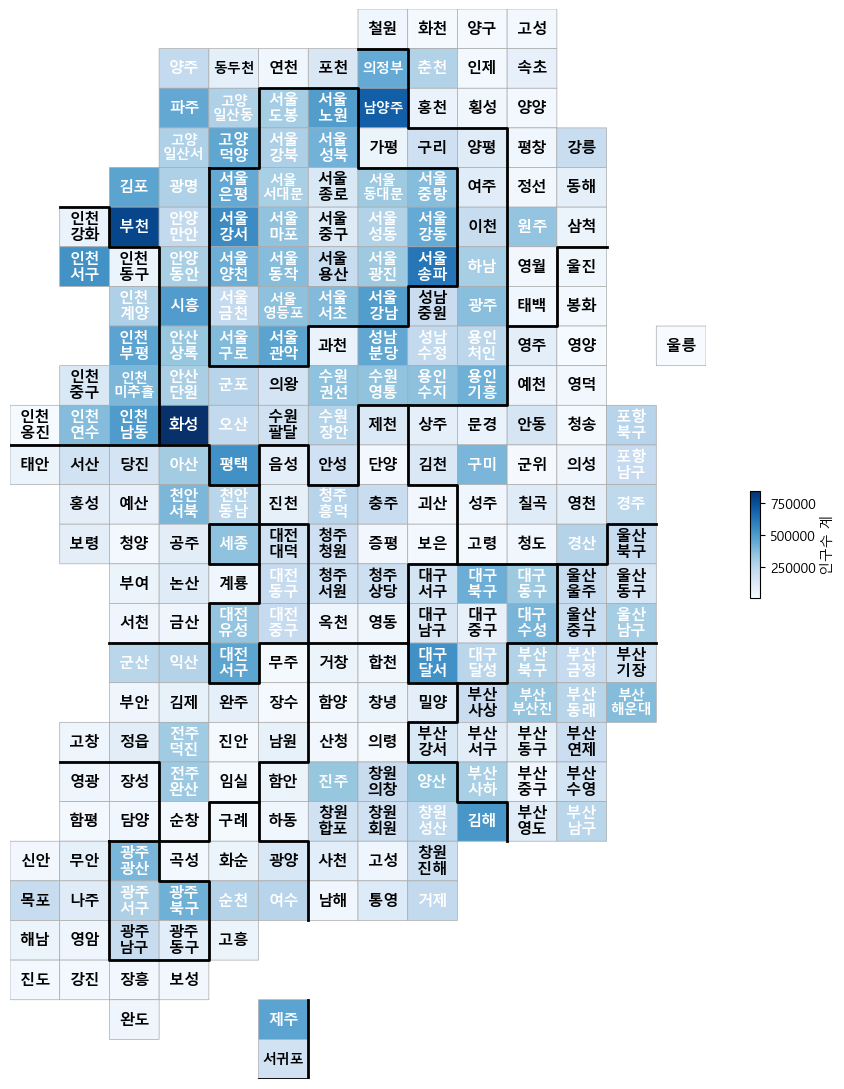

In [533]:
draw_korea_map('인구수 계', pop, 'Blues')

In [534]:
pop['소멸위기지역'] = pop['소멸위기지역'].astype(int)
pop['소멸위기고위험지역'] = pop['소멸위기고위험지역'].astype(int)

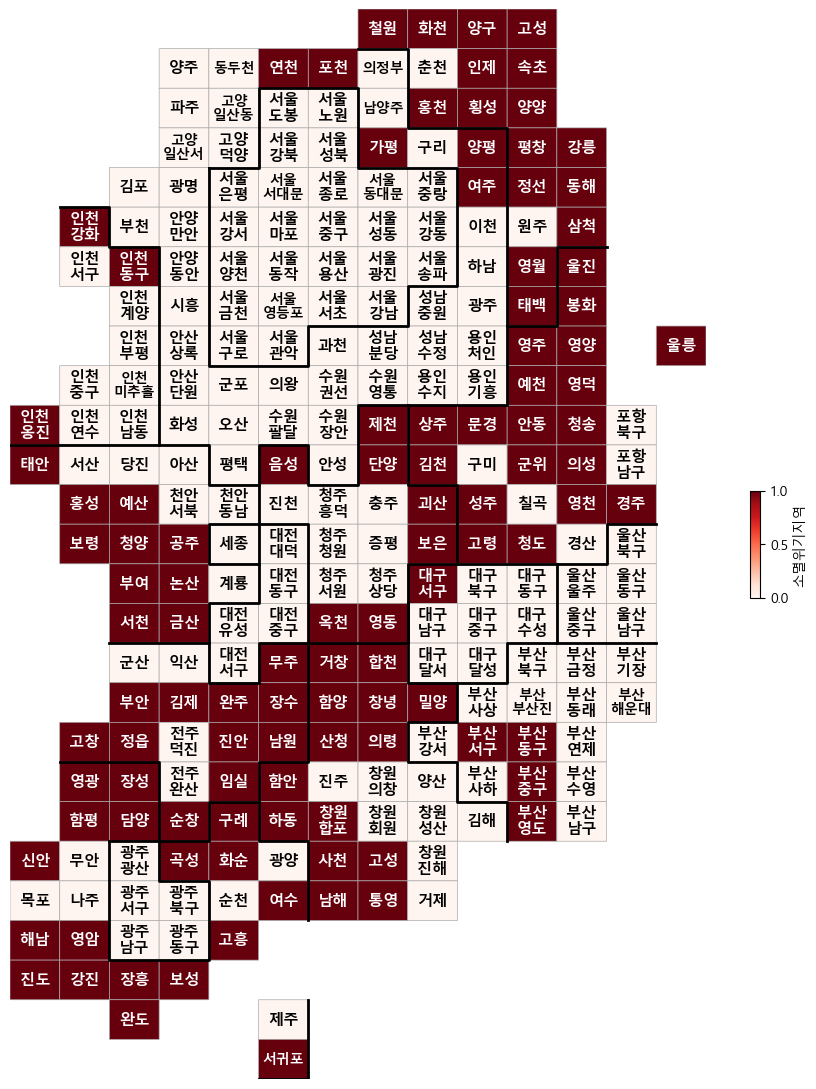

In [535]:

draw_korea_map('소멸위기지역', pop, 'Reds')

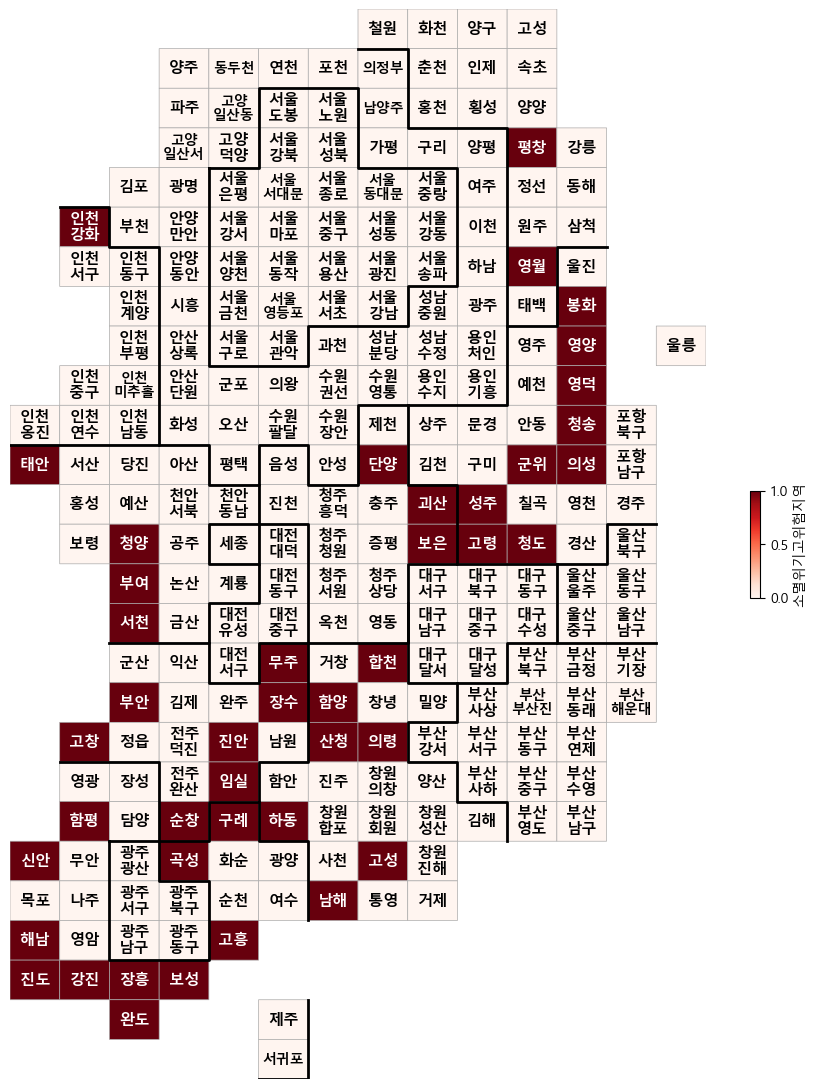

In [536]:
draw_korea_map('소멸위기고위험지역', pop, 'Reds')